In [18]:
import tellurium as te; te.setDefaultPlottingEngine('matplotlib')
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
model = '''
#functions # q: 1 fuer act, 0 fuer rep

#allgemeine funktion fuer act oder rep je nachdem ob q = 1 oder q = 0
function regfunc(U ,K ,H, q)
   ( (U/K)^H * q + 1*(1-q)) / (1 + (U/K)^H )
end

#allgemeine GateAND funktion
function gateand(U1, K1, U2, K2, H, q1, q2)
    ( regfunc(U1, K1, H, q1) ) * ( regfunc(U2, K2, H, q2))
end

#allgemeine GateOR funktion fuer act oder rep je nachdem ob q = 1 oder q = 0
function gar(U, Ku, V, Kv, H, q)
    ( (U/Ku)^H * q + 1 * (1-q) ) / ( 1+ (U/Ku)^H + (V/Kv)^H )
end

#allgemeine GateOR funktion
function gateor(U1, Ku, V1, Kv, H, q1, q2)
    gar(U1, Ku, V1, Kv, H, q1) + gar(V1, Kv, U1, Ku, H, q2)
end

X = 1;
Z = 0;
Y = 0;
Sx = 0;
Sy = 1;
By = 0;
Bz = 0;
by = 1;
bz = 1;
ay = 1;
az = 1;


X1 := Sx * X
Y1 := Sy * Y

H = 2;

Kxy = 0.1;
Kyz = 0.5;
Kxz = 0.1;



#ODE

Y'= By + by * regfunc(X1, Kxy, H, 1) - ay * Y
Z'= Bz + bz * gateand(X1, Kxz, Y1, Kyz, H, 0, 0) - az * Z
#Z' = Bz + bz * gateor(X1, Kxz, Y1, Kyz, H, 1, 1) - az * Z


#simple regulation
#Y' = 1
#Z'= Bz + bz * gateand(X1, Kxz, Y1, Kyz, H, 1, 1) - az * Z
#Z' = Bz + bz * gateor(X1, Kxz, Y1, Kyz, H, 1, 1) - az * Z


E1: at (time>0): Sx= 0;
E2: at (time>1): Sx=1;
E3: at (time>4): Sx=0;

'''


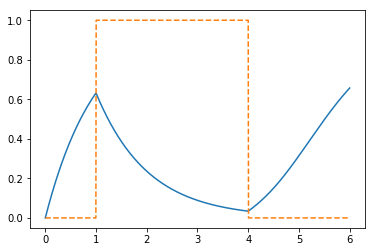

In [70]:
start = 0
end = 6
steps = 1000

r=te.loada(model)
plt.figure(1)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Z'])
plt.plot(res['time'], res['Sx'],'--')


#plt.figure(2)
#r.resetAll()
#r['test']=500;
#res = r.simulate(start, end, steps)
#plt.plot(res['time'], res['Z'])
#plt.plot(res['time'], res['Sx'],'--')

In [22]:
res

         time, X,           Y,           Z, Sx, Sy
 [[         0, 1,           0,           0,  0,  1],
  [   0.01001, 1,           0,           0,  0,  1],
  [   0.02002, 1,           0,           0,  0,  1],
  [   0.03003, 1,           0,           0,  0,  1],
  [   0.04004, 1,           0,           0,  0,  1],
  [ 0.0500501, 1,           0,           0,  0,  1],
  [ 0.0600601, 1,           0,           0,  0,  1],
  [ 0.0700701, 1,           0,           0,  0,  1],
  [ 0.0800801, 1,           0,           0,  0,  1],
  [ 0.0900901, 1,           0,           0,  0,  1],
  [    0.1001, 1,           0,           0,  0,  1],
  [   0.11011, 1,           0,           0,  0,  1],
  [   0.12012, 1,           0,           0,  0,  1],
  [   0.13013, 1,           0,           0,  0,  1],
  [   0.14014, 1,           0,           0,  0,  1],
  [   0.15015, 1,           0,           0,  0,  1],
  [   0.16016, 1,           0,           0,  0,  1],
  [   0.17017, 1,           0,           0,  0, 